In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.display import Audio

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


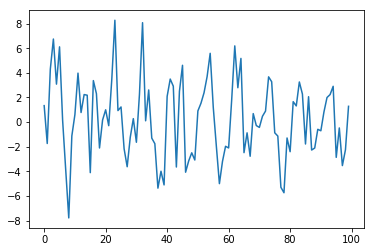

In [2]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
freq = np.linspace(1e3, 2e3, N)
x = amp * np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

plt.figure()
plt.plot(x[:100])

In [ ]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.figure()
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

# Import Audio


In [3]:
from scipy.io import wavfile

In [7]:
filename ="../MedleyDB_sample/Audio/LizNelson_Rainfall/LizNelson_Rainfall_RAW/LizNelson_Rainfall_RAW_02_01.wav"
sampFreq, snd = wavfile.read(filename)
# snd = snd / 2.**15
print(sampFreq)

44100


C:\ProgramData\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [5]:
print(snd.shape)
print(snd.max())

(12564480, 2)
7894


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(snd[7250000:7300000])

In [ ]:
x = snd[7250000:7300000]
fs = 44100
nperseg = 2048
noverlap = 512
f, t, Sxx = signal.spectrogram(x, fs, window='hann', nperseg=nperseg, noverlap=noverlap)
plt.figure()
plt.pcolormesh(t, f, Sxx)
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

# Test Mixing

In [11]:
vocalFile = '../MedleyDB_sample/Audio/LizNelson_Rainfall/LizNelson_Rainfall_STEMS/LizNelson_Rainfall_STEM_01.wav'
sampFreq, vocals = wavfile.read(vocalFile)
print (vocals.shape)
instrumentsFile = '../MedleyDB_sample/Audio/LizNelson_Rainfall/LizNelson_Rainfall_STEMS/LizNelson_Rainfall_STEM_04.wav'
sampFreq, instruments = wavfile.read(instrumentsFile)
print (instruments.shape)
print(sampFreq)

(12564480, 2)
(12564480, 2)
44100


C:\ProgramData\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [9]:
Audio(data=vocals, rate=sampFreq)
Audio(data=instruments, rate=sampFreq)


error: ushort format requires 0 <= number <= 0xffff

In [ ]:
mixture = vocals + instruments
Audio(data=mixture, rate=sampFreq)


error: ushort format requires 0 <= number <= 0xffff